Realizando os Imports das bibliotecas necessarias!

In [1]:

import pandas as pd
import numpy as np
import sounddevice as sd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import resampy
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

In [4]:
import os
import librosa
import librosa.display
import glob 
import skimage

Definindo o arquivo que contem todos os audios dos insetos.

In [5]:

zip_file = "utils\InsectSounds_2.zip"

# Extrair todos os arquivos do .zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("utils\Insetos")

# Agora que os arquivos estão extraídos, você pode acessar suas informações
# e combiná-las com o arquivo CSV, conforme mencionado anteriormente.


Realizando a leitura do arquivo CSV, entendendo a estrutura do Dataset

In [6]:
df = pd.read_csv('utils\Insect-Pest-Sounds-inventory_1.csv')
df.head()

,Category,File ID,Description
0,A. Stored Product Insect movement and feeding...,A.1,Plodia interpunctella larvae in dry dog food [...
1,A. Stored Product Insect movement and feeding...,A.2,Individual Plodia interpunctella larva in dry ...
2,A. Stored Product Insect movement and feeding...,A.3,Sitophilus oryzae larvae (17-18 d old) in whea...
3,A. Stored Product Insect movement and feeding...,A.4,Sitophilus oryzae larvae (16-17 d old) in whea...
4,A. Stored Product Insect movement and feeding...,A.5,Sitophilus oryzae larvae (16-17 d old) in whea...


Capturando todos os nomes dos audios e realizando a conversão da Classe para um tipo numerico.

In [7]:

listaAudios = []
listaClasse = []

for root, dir, files in os.walk("utils\Insetos"):
    for filename in files:
        listaAudios.append(filename) 

for i in range(len(df["File ID"])):

    if df["File ID"][i].startswith("A"):
        df["File ID"][i] = "1"

    if df["File ID"][i].startswith("B"):
        df["File ID"][i] = "2"

    if df["File ID"][i].startswith("C"):
        df["File ID"][i] = "3"

    if df["File ID"][i].startswith("D"):
        df["File ID"][i] = "4"

    if df["File ID"][i].startswith("E"):
        df["File ID"][i] = "5"

    if df["File ID"][i].startswith("F"):
        df["File ID"][i] = "6"

    if df["File ID"][i].startswith("G"):
        df["File ID"][i] = "7"

    if df["File ID"][i].startswith("H"):
        df["File ID"][i] = "8"

    if df["File ID"][i].startswith("I"):
        df["File ID"][i] = "9"

for classe in df["File ID"]:
    listaClasse.append(classe)



dfAudios = pd.DataFrame(listaAudios, columns=["Name File"])

dfClasses = pd.DataFrame(listaClasse, columns=["Class Audio"])

dfAudios

df["File ID"] = dfAudios["Name File"].str.split("-").str[0] 

df_novo = pd.concat(([df, dfAudios, dfClasses]), axis=1)

df_novo.to_csv("utils\\Filtered-Pest-Sounds")

df_novo


#dfFormatado = pd.concat([df, pd.DataFrame(listaAudios, columns=["Name File"]], axis=1))


,Category,File ID,Description,Name File,Class Audio
0,A. Stored Product Insect movement and feeding...,A1,Plodia interpunctella larvae in dry dog food [...,A1-dfaccs11.wav,1
1,A. Stored Product Insect movement and feeding...,A10,Individual Plodia interpunctella larva in dry ...,A10-ptr-l-m4r2f4-2s.wav,1
2,A. Stored Product Insect movement and feeding...,A11,Sitophilus oryzae larvae (17-18 d old) in whea...,A11-ptr_adu1-72s.wav,1
3,A. Stored Product Insect movement and feeding...,A12,Sitophilus oryzae larvae (16-17 d old) in whea...,A12-roachmoves_m54524.wav,1
4,A. Stored Product Insect movement and feeding...,A2,Sitophilus oryzae larvae (16-17 d old) in whea...,A2-piezimm1.wav,1
...,...,...,...,...,...
90,I. Examples to distinguish insect sounds from ...,I3,Plane noise recorded with accelerometer on nai...,I3-monrbck1.wav,9
91,I. Examples to distinguish insect sounds from ...,I4,Plane and truck noise at commercial nursery. ...,I4-monrbck2.wav,9
92,I. Examples to distinguish insect sounds from ...,I5,Truck noise recorded in a pot containing black...,I5-monrbck3.wav,9
93,I. Examples to distinguish insect sounds from ...,I6,Wind noise and background recorded from an acc...,I6-nwrec1.wav,9


Realizando a leitura de um audio aleatorio, e capturando as informações mais relevantes

In [8]:
import scipy.io.wavfile as wav

# Carregar arquivo de som
filename = "utils\Insetos\G1b-fireants_shortclip.wav"
sample_rate, sound_data = wav.read(filename)

# Exibir informações sobre o arquivo de som
print("Taxa de amostragem:", sample_rate)
print("Duração:", len(sound_data) / sample_rate, "segundos")

sd.play(sound_data, sample_rate)
sd.wait()

time = np.arange(0, len(sound_data)) / sample_rate





Taxa de amostragem: 25000
Duração: 11.23856 segundos


Plotando em um gráfico as vibrações do audio

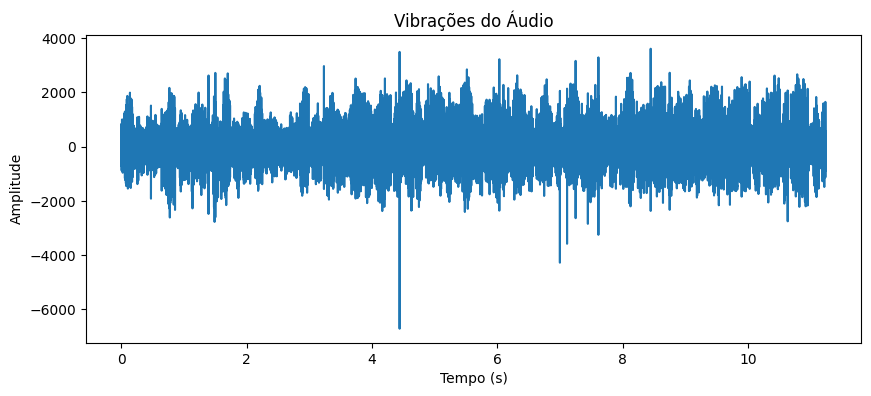

In [9]:
# Plotar o gráfico das vibrações do áudio
plt.figure(figsize=(10, 4))
plt.plot(time, sound_data)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Vibrações do Áudio')
plt.show()


Desta vez, realizando a leitura em um espectograma

In [10]:
dat1, sampling_rate1 = librosa.load('utils\Insetos\F16-3m-et0001300trial3rhopalidshort.wav')
dat2, sampling_rate2 = librosa.load('utils\Insetos\F10d-Groupsyllidcalling2-168-10-01-15.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

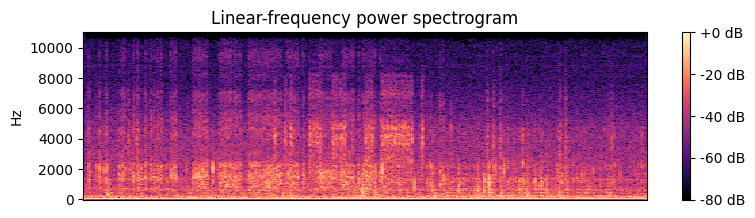

In [11]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

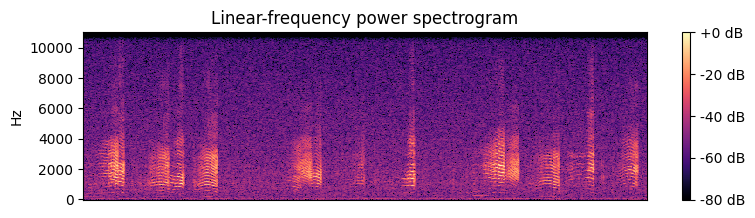

In [12]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Realizando a leitura de todos os audios, e capturando suas informações

In [13]:
listaDuracao = []
listaAmostragem = []

for audio in listaAudios:
    filename = f'utils\Insetos\{audio}'
    sample_rate, sound_data = wav.read(filename)
    time = np.arange(0, len(sound_data)) / sample_rate

    listaDuracao.append(time)
    listaAmostragem.append(sample_rate)

    print(f'Nome do audio: {audio}')
    print("Taxa de amostragem:", sample_rate)
    print("Duração:", len(sound_data) / sample_rate, "segundos")
    print("------------------------------------------------------------")

 



Nome do audio: A1-dfaccs11.wav
Taxa de amostragem: 25000
Duração: 30.0 segundos
------------------------------------------------------------
Nome do audio: A10-ptr-l-m4r2f4-2s.wav
Taxa de amostragem: 20000
Duração: 18.58795 segundos
------------------------------------------------------------
Nome do audio: A11-ptr_adu1-72s.wav
Taxa de amostragem: 20000
Duração: 21.03895 segundos
------------------------------------------------------------
Nome do audio: A12-roachmoves_m54524.wav
Taxa de amostragem: 10000
Duração: 35.3824 segundos
------------------------------------------------------------
Nome do audio: A2-piezimm1.wav
Taxa de amostragem: 25000
Duração: 10.0 segundos
------------------------------------------------------------
Nome do audio: A3-pvdfrw1.wav
Taxa de amostragem: 25000
Duração: 10.0 segundos
------------------------------------------------------------
Nome do audio: A4-accelrw.wav
Taxa de amostragem: 25000
Duração: 10.0 segundos
------------------------------------------

Fazendo a leitura de um audio aleatorio, capturando o seu shape após um processo de spectogram

In [14]:
'''EXAMPLE'''

dat1, sampling_rate1 = librosa.load('utils\Insetos\F12-bstbugmalecall-m1.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 435)

In [15]:

feature = []
label = []
import librosa

def parser(row):
    for i in range(95):
        file_name = f'utils\\Insetos\\{df_novo["Name File"][i]}'
        X, sample_rate = librosa.load(file_name, sr=None) 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)        
        feature.append(mels)
        label.append(df_novo["Class Audio"][i])

    return [feature, label]
    

In [16]:
temp = parser(df_novo)

C:\Users\Jhonatas Dev\AppData\Local\Temp\ipykernel_2744\4081275674.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sample_rate = librosa.load(file_name, sr=None)
c:\Users\Jhonatas Dev\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
c:\Users\Jhonatas Dev\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


In [17]:
temp = np.array(temp)
data = temp.transpose()




C:\Users\Jhonatas Dev\AppData\Local\Temp\ipykernel_2744\542048175.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(temp)


In [18]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([95, 128])

(95,) (95,)


In [19]:
for i in range(95):
    X[i, :] = X_[i]



In [20]:
Y = to_categorical(Y)

In [21]:
'''Final Data'''
print(X.shape)
print(Y.shape)

(95, 128)
(95, 10)


In [22]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [23]:
X_train = X_train.reshape(X_train.shape[0], 16, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 16, 8, 1)




In [24]:
input_shape=(16, 8, 1)

model = Sequential()

model.add(Conv2D(16, (3, 3), padding = "same", activation = "tanh", input_shape = input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 120, batch_size = 30, validation_data = (X_test, Y_test))

Epoch 1/120
3/3 [==============================] - 1s 89ms/step - loss: 2.2673 - accuracy: 0.0658 - val_loss: 2.1446 - val_accuracy: 0.1579
Epoch 2/120
3/3 [==============================] - 0s 14ms/step - loss: 2.0730 - accuracy: 0.3158 - val_loss: 2.0436 - val_accuracy: 0.2105
Epoch 3/120
3/3 [==============================] - 0s 19ms/step - loss: 1.9361 - accuracy: 0.3553 - val_loss: 1.9832 - val_accuracy: 0.2105
Epoch 4/120
3/3 [==============================] - 0s 15ms/step - loss: 1.8602 - accuracy: 0.3947 - val_loss: 1.9431 - val_accuracy: 0.2632
Epoch 5/120
3/3 [==============================] - 0s 15ms/step - loss: 1.7541 - accuracy: 0.3947 - val_loss: 1.9185 - val_accuracy: 0.2632
Epoch 6/120
3/3 [==============================] - 0s 15ms/step - loss: 1.6853 - accuracy: 0.4474 - val_loss: 1.9051 - val_accuracy: 0.2632
Epoch 7/120
3/3 [==============================] - 0s 14ms/step - loss: 1.6095 - accuracy: 0.4342 - val_loss: 1.8967 - val_accuracy: 0.2105
Epoch 8/120
3/3 [===

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 64)          9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 64)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0

In [26]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

1/1 [==============================] - 0s 25ms/step - loss: 1.9293 - accuracy: 0.4211
[1.9292887449264526, 0.42105263471603394]


In [27]:
preds = np.argmax(predictions, axis = 1)

result = pd.DataFrame(preds)

In [28]:
result.to_csv("utils\\results.csv")